### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('coupons.csv')

In [8]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [11]:
#data.info()
#data.describe()
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [13]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [15]:
data['car'] = data['car'].fillna('n/a')

In [17]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon?

In [21]:
data_cleaned  = data.dropna()
data_cleaned

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [23]:

total_observations = len(data_cleaned)
accepted = data_cleaned['Y'].sum()

proportion = accepted / total_observations

print(f"Proportion of Accepted Coupons: {proportion:.2%}")

Proportion of Accepted Coupons: 56.93%


5. Use a bar plot to visualize the `coupon` column.

C:\Users\carl1\AppData\Local\Temp\ipykernel_17456\640784833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='coupon', palette='Set1')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

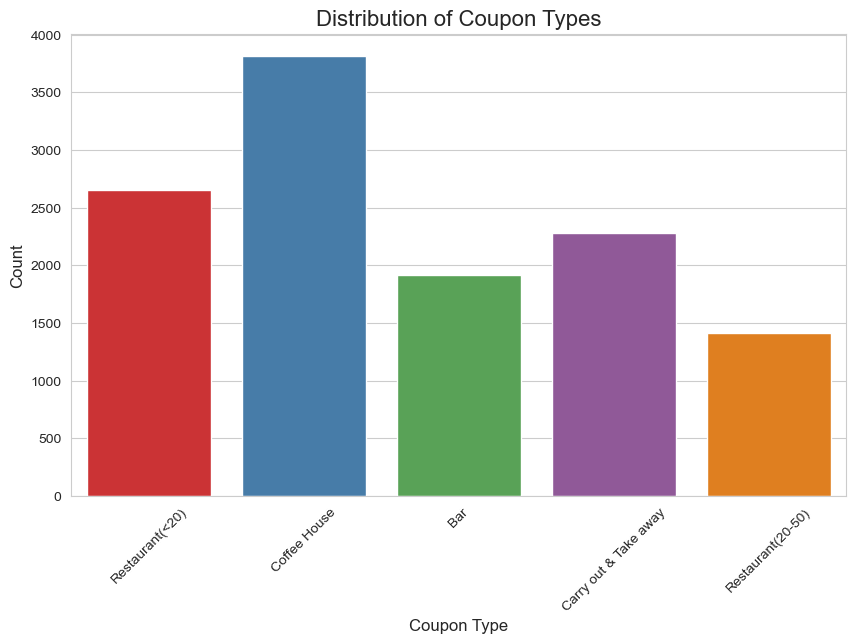

In [26]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(data=data_cleaned, x='coupon', palette='Set1')
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


6. Use a histogram to visualize the temperature column.

C:\Users\carl1\AppData\Local\Temp\ipykernel_17456\2644027978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_counts.index, y=temp_counts.values, palette="Set1")


Text(0, 0.5, 'Frequency')

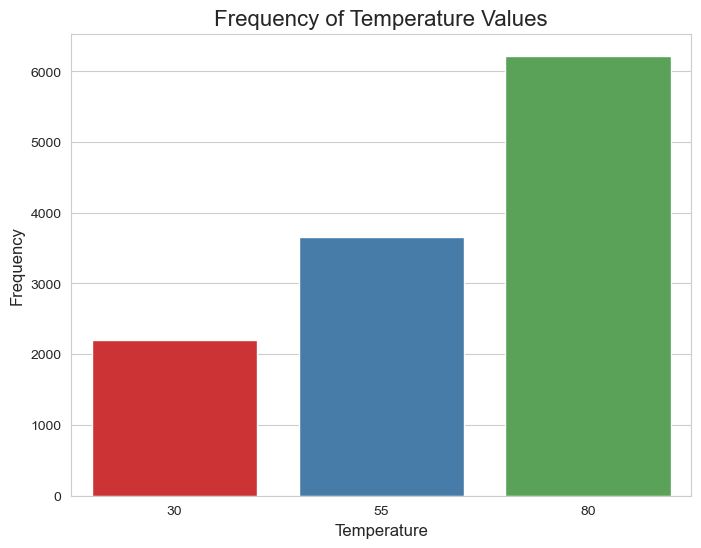

In [29]:
temp_counts = data_cleaned['temperature'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=temp_counts.index, y=temp_counts.values, palette="Set1")
plt.title('Frequency of Temperature Values', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
bar_data = data_cleaned[data_cleaned['coupon'] == 'Bar']
bar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  car                   1913 non-null   object
 15  Bar                   1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [39]:
bar_observations = len(bar_data)
bar_accepted = bar_data['Y'].sum()

bar_proportion = bar_accepted / bar_observations

print(f"Proportion of Accepted Coupons: {bar_proportion:.2%}")

Proportion of Accepted Coupons: 41.19%


In [41]:
print(bar_data['Bar'].unique())



['never' 'less1' '1~3' 'gt8' '4~8']


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [44]:
bar_data['bar_visits_group'] = bar_data['Bar'].apply(
    lambda x: '3 or fewer' if x in ['less1', 'never', '1~3'] else 'more than 3'
)

print(bar_data.groupby('bar_visits_group')['Y'].count())

acceptance_rate = bar_data.groupby('bar_visits_group')['Y'].mean()

print(acceptance_rate)


bar_visits_group
3 or fewer     1720
more than 3     193
Name: Y, dtype: int64
bar_visits_group
3 or fewer     0.372674
more than 3    0.761658
Name: Y, dtype: float64


C:\Users\carl1\AppData\Local\Temp\ipykernel_17456\2459743021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['bar_visits_group'] = bar_data['Bar'].apply(


In [46]:
print(bar_data['Bar'].unique())


['never' 'less1' '1~3' 'gt8' '4~8']


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [49]:
data_cleaned = bar_data.copy()
bar_data.loc[:, 'bar_visits_group'] = data_cleaned['Bar'].apply(
    lambda x: 'more than 1' if x in ['1~3', '4~8', 'gt8'] else '1 or fewer')

data_cleaned['over_25_more_than_1'] = data_cleaned.apply(
    lambda row: 'over_25_more_than_1' if row['bar_visits_group'] == 'more than 1' and row['age'] > 25 else 'other', axis=1)

acceptance_rate_25 = data_cleaned.groupby('over_25_more_than_1')['Y'].mean()

print(acceptance_rate_25)



over_25_more_than_1
other    0.411918
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [52]:
data_cleaned = data_cleaned.copy()

data_cleaned.loc[:, 'bar_visits_group'] = data_cleaned['Bar'].apply(
    lambda x: 'more than 1' if x in ['1~3', '4~8', 'gt8'] else '1 or fewer')

data_cleaned['more_than_1_no_kid_non_farming'] = data_cleaned.apply(
    lambda row: 'more_than_1_no_kid_non_farming' 
    if row['bar_visits_group'] == 'more than 1' 
    and row['passanger'] != 'Kid(s)' 
    and row['occupation'] not in ['Farming', 'Fishing', 'Forestry']
    else 'other', axis=1)

acceptance_rate = data_cleaned.groupby('more_than_1_no_kid_non_farming')['Y'].mean()

# Step 4: Print the acceptance rates
print(acceptance_rate)


more_than_1_no_kid_non_farming
more_than_1_no_kid_non_farming    0.709434
other                             0.297903
Name: Y, dtype: float64


In [65]:
data_cleaned['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [67]:
import pandas as pd

# Safely copy the original DataFrame
df = data_cleaned.copy()

# Convert the 'age' column to numeric (ignoring errors)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Define a mapping for the 'income' column to convert income ranges into numerical values
income_mapping = {
    'Less than $12500': 12500,
    '$12500 - $24999': 24999,
    '$25000 - $37499': 37499,
    '$37500 - $49999': 49999,
    '$50000 - $62499': 62499,
    '$62500 - $74999': 74999,
    '$75000 - $87499': 87499,
    '$87500 - $99999': 99999,
    '$100000 or More': 100000
}

# Apply the income mapping
df['income_numeric'] = df['income'].map(income_mapping)

# Define the conditions based on the given criteria

# Condition 1: Go to bars more than once a month, passengers are not kids, and not widowed
condition1 = (df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df['passanger'] != 'Kid(s)') & (df['maritalStatus'] != 'Widowed')

# Condition 2: Go to bars more than once a month and are under the age of 30
condition2 = (df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df['age'] < 30)

# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than $50K
condition3 = (df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (df['income_numeric'] < 50000)

# Combine the conditions with OR (|)
combined_condition = condition1 | condition2 | condition3

# Calculate the acceptance rates for drivers meeting the conditions
acceptance_rate_met_conditions = df[combined_condition]['Y'].mean()

# Calculate the acceptance rates for drivers who do not meet the conditions
acceptance_rate_not_met_conditions = df[~combined_condition]['Y'].mean()

# Calculate the number of drivers who do not meet the conditions
drivers_not_meeting_conditions = len(df[~combined_condition])

# Print the results
print(f"Acceptance rate for drivers who meet the conditions: {acceptance_rate_met_conditions:.2%}")
print(f"Acceptance rate for drivers who do not meet the conditions: {acceptance_rate_not_met_conditions:.2%}")
print(f"Number of drivers who do not meet the conditions: {drivers_not_meeting_conditions}")


Acceptance rate for drivers who meet the conditions: 58.71%
Acceptance rate for drivers who do not meet the conditions: 29.99%
Number of drivers who do not meet the conditions: 1167


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on the observations, factors like frequent bar visits, younger age, and lower income seem to influence coupon acceptance rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [71]:
data_cleaned['education'].unique()

array(['Bachelors degree', 'Some college - no degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

Acceptance rate by education level:
education
Associates degree                         0.299435
Bachelors degree                          0.415214
Graduate degree (Masters or Doctorate)    0.370229
High School Graduate                      0.405594
Some High School                          0.785714
Some college - no degree                  0.447522
Name: Y, dtype: float64


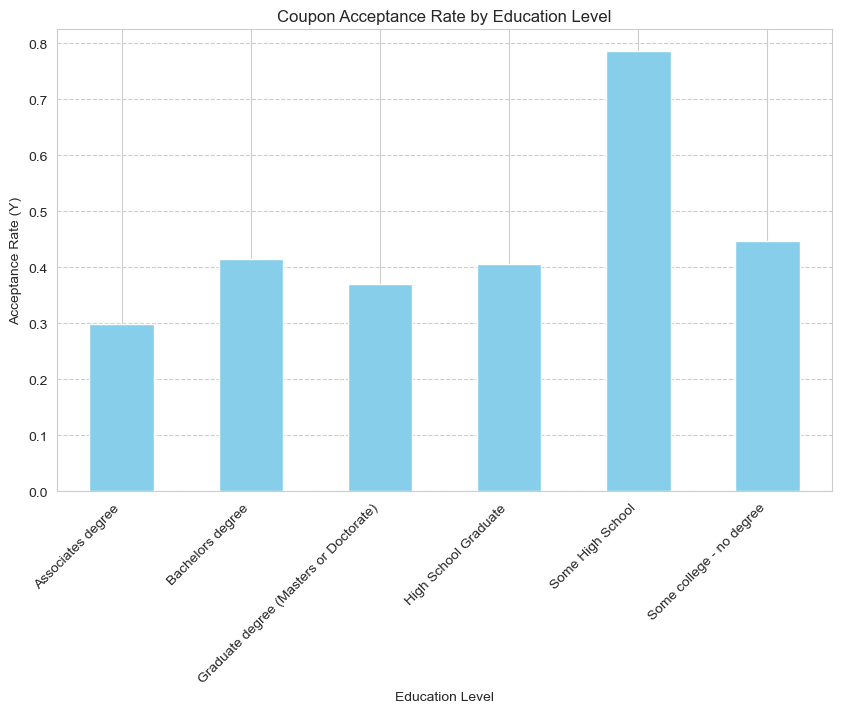

In [73]:
education_acceptance_rate = data_cleaned.groupby('education')['Y'].mean()
print("Acceptance rate by education level:")
print(education_acceptance_rate)
plt.figure(figsize=(10, 6))
education_acceptance_rate.plot(kind='bar', color='skyblue')
plt.title('Coupon Acceptance Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate (Y)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


In [ ]:
# Among the education level column, the obvious observation to make is that high school dropouts ('Some High School') are the most likely to accept the coupon

# A follow question to ask is, is this the right type of customer to target (ie do they have money to spend)? 

C:\Users\carl1\AppData\Local\Temp\ipykernel_17456\332672575.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='income_numeric', data=data_cleaned, palette='Set2')


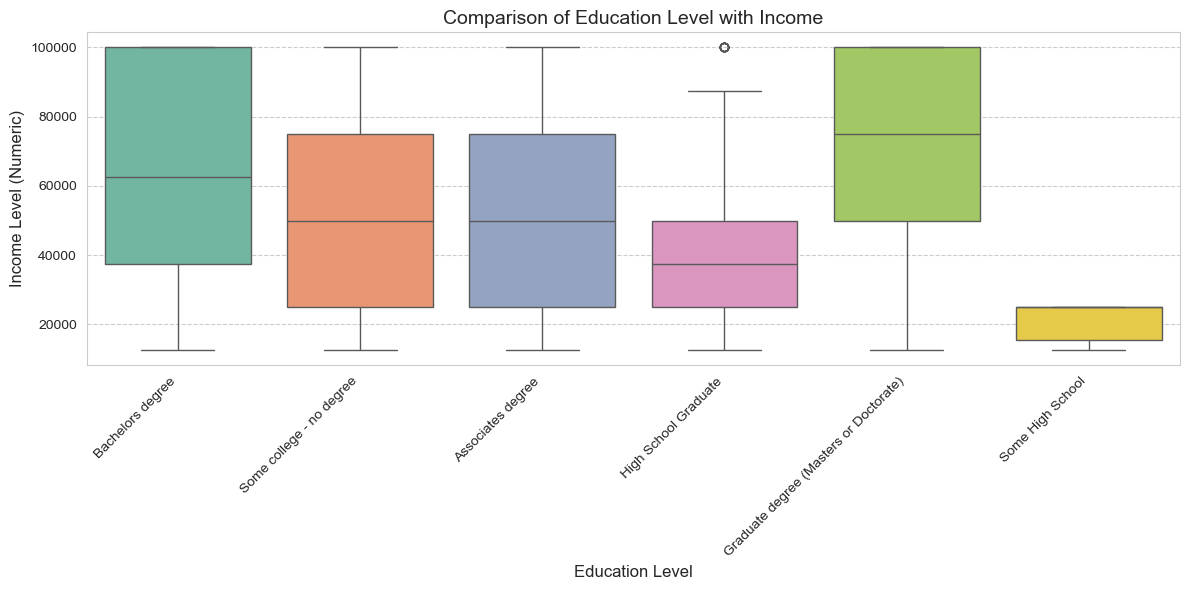

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, ensure that income is mapped to numeric values for proper comparison
income_mapping = {
    'Less than $12500': 12500,
    '$12500 - $24999': 24999,
    '$25000 - $37499': 37499,
    '$37500 - $49999': 49999,
    '$50000 - $62499': 62499,
    '$62500 - $74999': 74999,
    '$75000 - $87499': 87499,
    '$87500 - $99999': 99999,
    '$100000 or More': 100000
}

# Create a new column for numerical income levels
data_cleaned['income_numeric'] = data_cleaned['income'].map(income_mapping)

# Visualize the comparison between education level and income
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='income_numeric', data=data_cleaned, palette='Set2')

# Set titles and labels for clarity
plt.title('Comparison of Education Level with Income', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Income Level (Numeric)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()
